# Modelo CNN

In [ ]:
import os
import cv2
import keras
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.utils.np_utils import to_categorical

In [ ]:
!git clone "https://github.com/PabloPoche/interprete_braille.git"

Cloning into 'interprete_braille'...
remote: Enumerating objects: 1873, done.
remote: Counting objects: 100% (1873/1873), done.
remote: Compressing objects: 100% (208/208), done.
remote: Total 1873 (delta 1667), reused 1765 (delta 1642), pack-reused 0
Receiving objects: 100% (1873/1873), 1.76 MiB | 29.56 MiB/s, done.
Resolving deltas: 100% (1667/1667), done.


In [ ]:
image_dir= Path ('/content/interprete_braille/Braille Dataset')

In [ ]:
dir_list = list(image_dir.glob('*.jpg'))

In [ ]:
name_list = []
for i in dir_list:
    name_list.append(os.path.basename(i)[0])

1560


In [ ]:
images = []
for dir in dir_list:
    I = cv2.imread(str(dir), cv2.IMREAD_GRAYSCALE)
    images.append(I)

# Explorar datos

In [ ]:
image_count = len(dir_list)
print('Cantidad de datos:', image_count)

Cantidad de datos: 1560


In [ ]:
print('Tamaño de cada dato en escala de grises:', images[0].shape)

Tamaño de cada dato en escala de grises: (28, 28)


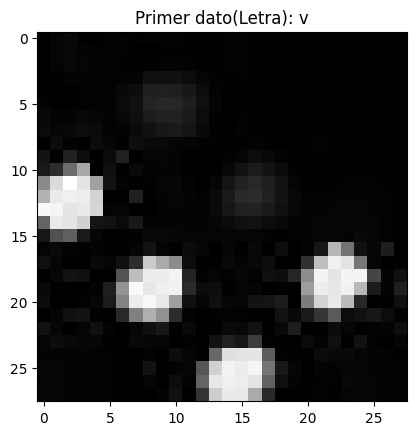

In [ ]:
plt.imshow(images[0], cmap='Greys')
plt.title("Primer dato(Letra): " + name_list[0])
plt.show()

# Procesar datos

In [ ]:
images_list = np.array(images)
name_list = np.array(name_list).T
print(name_list[:5])

['v' 'h' 'l' 'z' 'b']


In [ ]:
images_list = images_list/255
images_list = images_list.reshape(images_list.shape[0], images_list.shape[1], images_list.shape[2], 1).astype('float32')
le = LabelEncoder()
name_list = le.fit_transform(name_list)
print(name_list[:5])

[21  7 11 25  1]


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images_list, name_list, test_size=0.2, random_state=42)

In [ ]:
print('Cantidad de datos para entrenamiento:', X_train.shape[0])
print('Cantidad de datos para evaluacion:', X_test.shape[0])

Cantidad de datos para entrenamiento: 1248
Cantidad de datos para evaluacion: 312


In [ ]:
print('Tamaño de cada datos para entrenamiento:', X_train[0].shape)

Tamaño de cada uno de los datos: (28, 28, 1)


# Entrenar modelo

In [ ]:
in_shape = X_train.shape[1:]
in_shape

(28, 28, 1)

In [ ]:
out_shape = to_categorical(y_train).shape[1]
out_shape

26

In [ ]:
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D


In [ ]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(5, 5), padding='same', activation='relu', input_shape=in_shape))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(units=576, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=288, activation="relu"))
model.add(Dense(units=out_shape, activation="softmax")) #output layer

model.compile(optimizer="Adam",
              loss="SparseCategoricalCrossentropy",
              metrics=["accuracy"])


In [ ]:
from keras.callbacks import EarlyStopping
es1 = EarlyStopping(patience=20, monitor="val_accuracy", mode="auto")
es2 = EarlyStopping(patience=20, monitor="val_loss", mode="auto")

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=100, callbacks=[es1, es2])

Epoch 1/100
28/28 [==============================] - 3s 19ms/step - loss: 3.2633 - accuracy: 0.0344 - val_loss: 3.2645 - val_accuracy: 0.0187
Epoch 2/100
28/28 [==============================] - 0s 11ms/step - loss: 3.2564 - accuracy: 0.0470 - val_loss: 3.2703 - val_accuracy: 0.0267
Epoch 3/100
28/28 [==============================] - 0s 11ms/step - loss: 3.2525 - accuracy: 0.0355 - val_loss: 3.2643 - val_accuracy: 0.0293
Epoch 4/100
28/28 [==============================] - 0s 11ms/step - loss: 3.2163 - accuracy: 0.0424 - val_loss: 3.1255 - val_accuracy: 0.0587
Epoch 5/100
28/28 [==============================] - 0s 8ms/step - loss: 2.8113 - accuracy: 0.1546 - val_loss: 2.1443 - val_accuracy: 0.3760
Epoch 6/100
28/28 [==============================] - 0s 8ms/step - loss: 2.0771 - accuracy: 0.3666 - val_loss: 1.6072 - val_accuracy: 0.5227
Epoch 7/100
28/28 [==============================] - 0s 9ms/step - loss: 1.6138 - accuracy: 0.5132 - val_loss: 1.1893 - val_accuracy: 0.6907
Epoch 8/1

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        1664      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 64)         

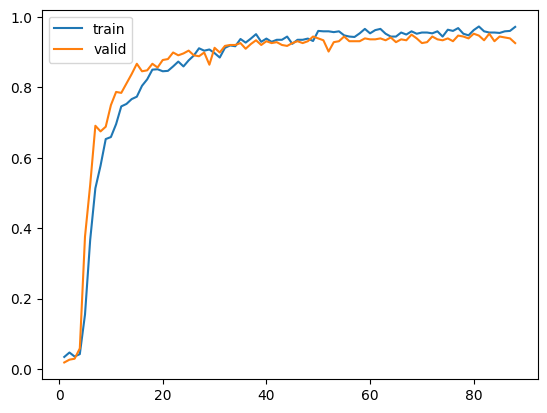

In [ ]:
epoch_count = range(1, len(history.history['accuracy']) + 1)
sns.lineplot(x=epoch_count,  y=history.history['accuracy'], label='train')
sns.lineplot(x=epoch_count,  y=history.history['val_accuracy'], label='valid')
plt.show()

In [ ]:
y_hat_prob= model.predict(X_test)
y_hat_prob[:1]

10/10 [==============================] - 0s 2ms/step


array([[5.23114903e-03, 2.37801258e-04, 2.57980224e-04, 6.08424529e-08,
        8.32519727e-05, 2.81663404e-07, 2.69555596e-08, 4.15791476e-07,
        1.84284092e-03, 1.56439100e-07, 9.91802514e-01, 2.82269139e-06,
        1.43576572e-05, 9.44199599e-08, 4.98511727e-05, 1.09662786e-08,
        4.96550856e-10, 3.14723145e-08, 2.27803980e-06, 4.06863640e-11,
        4.71995620e-04, 1.80986248e-08, 9.07886197e-11, 2.05475453e-06,
        7.49483739e-11, 9.50146362e-09]], dtype=float32)

In [ ]:
print("Letras testeadas: ", le.classes_[y_test[:5]])
y_hat= np.argmax(y_hat_prob, axis=1)
predictions= le.classes_[y_hat]
print("Letras predecidas:", predictions[:5])

Letras testeadas:  ['c' 'd' 'p' 'h' 'b']
Letras predecidas: ['k' 'd' 'p' 'h' 'b']


# Validar modelo

In [ ]:
scores = model.evaluate(X_test, y_test)
print("Excactitud del modelo (%): ")
scores[1]*100

10/10 [==============================] - 0s 3ms/step - loss: 0.4208 - accuracy: 0.8974
Excactitud del modelo(%): 


89.74359035491943

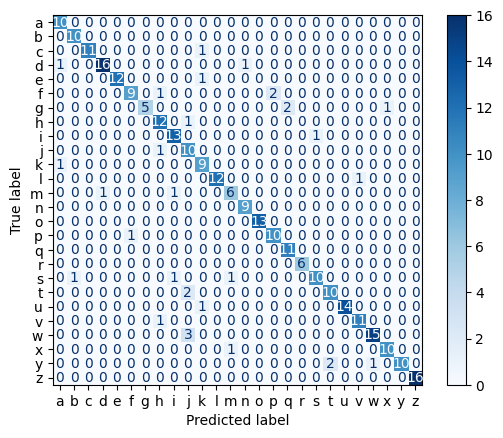

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_hat)
cmd = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
cmd.plot(cmap=plt.cm.Blues)
plt.show()

# Probar modelo

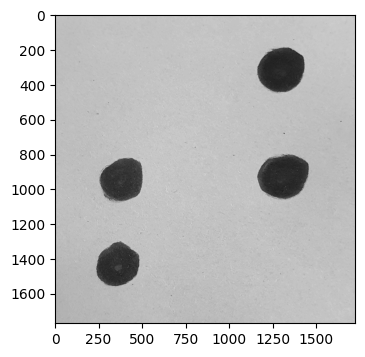

1/1 [==============================] - 0s 96ms/step
               Prediccion: ['t']


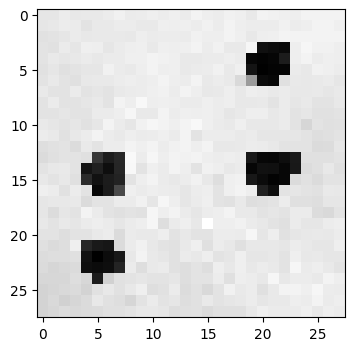

In [ ]:
image= "/content/interprete_braille/static/images/letra_t.jpg"
image= cv2.imread(image, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(4,4))
plt.imshow(image, cmap="gray")
plt.show()

resized_img= cv2.resize(image, (28, 28), Image.LANCZOS)
resized_img= resized_img/255
resized_img_for_prediction= resized_img.reshape(1, 28,28, 1)
pred = model.predict([resized_img_for_prediction])
predictions= le.classes_[pred.argmax(axis=1)]

print("          Prediccion letra:", predictions)
plt.figure(figsize=(4,4))
plt.imshow(image, cmap="gray")
plt.imshow(resized_img, cmap="gray")
plt.show()

# Guardar modelo

In [ ]:
import pickle
model.save("braille_model.h5")
pickle.dump(le,open("braille_encoder.pkl", "wb"))